# Task 2: Modular Time Series Forecasting

This notebook demonstrates the enhanced modular forecasting system with ARIMA and LSTM models.

## Features
- 🏗️ Modular architecture with clean interfaces
- ⚙️ Configuration management
- 🏭 Factory pattern for model creation
- 📊 Standardized evaluation and comparison
- ⚡ Simple one-liner functions

## Step 1: Setup and Imports

In [1]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add src to path
sys.path.append('../src')

# Import the modular forecasting system
from task2 import (
    forecast, quick_forecast, compare_models,  # Simple functions
    ForecastingPipeline, ConfigManager,       # Pipeline and config
    ModelFactory, ModelEvaluator              # Factory and evaluation
)

print("✅ Imports successful")

✅ Imports successful


## Step 2: Ultra-Simple Forecasting

The simplest way to run forecasting with one line of code.

🚀 FORECASTING PIPELINE
✅ Loaded TSLA data: 1256 observations
📅 Date range: 2020-08-10 to 2025-08-08

🔧 ARIMA Analysis
ADF Statistic: -2.9405
p-value: 0.0408
Critical Values: {'1%': -3.4369525024039884, '5%': -2.8644550095200705, '10%': -2.568322093455802}
Stationary: Yes
Searching for optimal ARIMA parameters...
Best parameters: ARIMA(4, 2, 5) with AIC: 7230.16
✅ ARIMA(4, 2, 5) model fitted successfully
✅ Model saved to models/arima_model.pkl
📊 ARIMA - MAE: 88.9167, RMSE: 109.4539

🔧 LSTM Analysis
Training LSTM model for 50 epochs...
✅ LSTM model trained successfully
✅ LSTM model saved to models/lstm_model.h5
📊 LSTM - MAE: 13.2656, RMSE: 17.6324
📊 MODEL COMPARISON REPORT

📈 Performance Metrics:
           MAE      RMSE     MAPE
ARIMA  88.9167  109.4539  26.1502
LSTM   13.2656   17.6324   4.3547

🏆 Best Model by Metric:
MAE: LSTM (13.2656)
RMSE: LSTM (17.6324)
MAPE: LSTM (4.3547)

🥇 Overall Ranking (by average rank):
1. LSTM (Average Rank: 1.00)
2. ARIMA (Average Rank: 2.00)

📊 Statisti

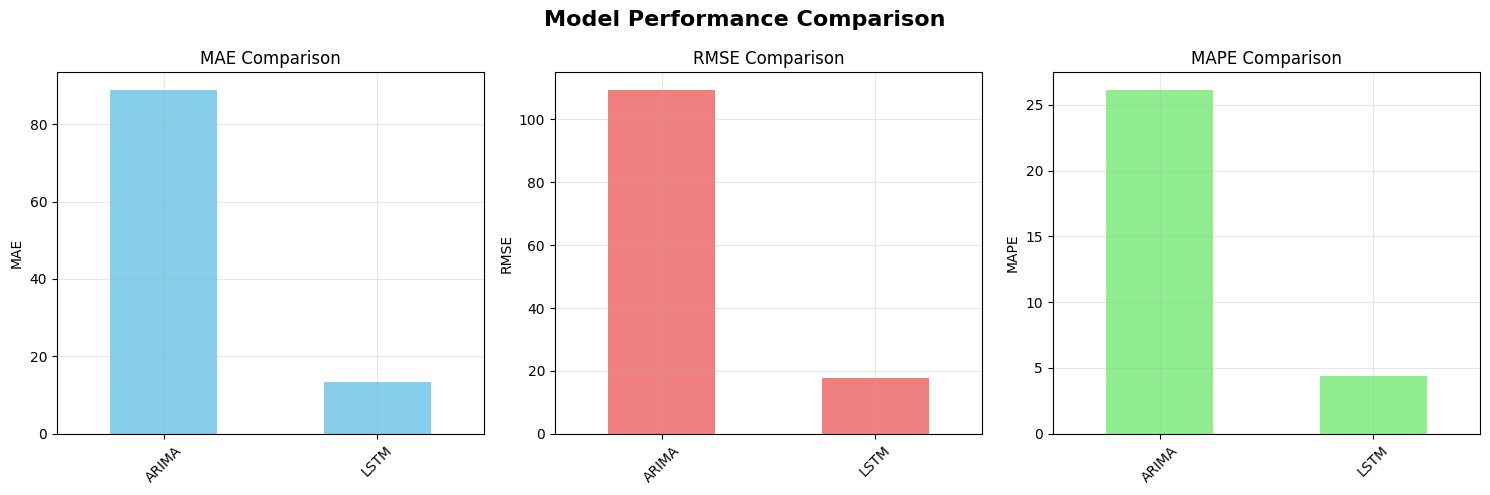

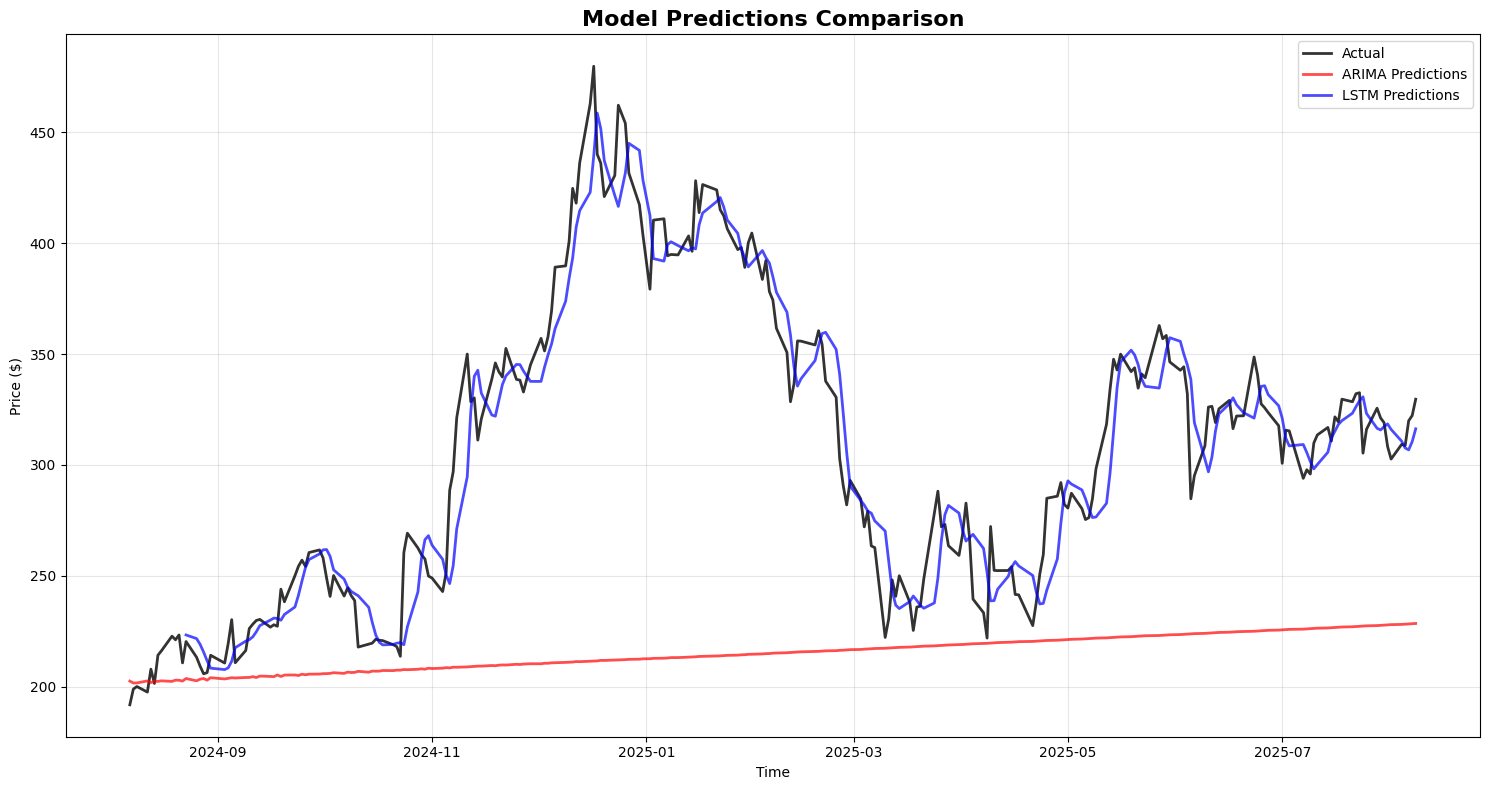

❌ Plotting failed: x and y must have same first dimension, but have shapes (192,) and (240,)
📊 Results available but plotting skipped
✅ Results exported to results/task2/model_comparison.csv
✅ Results exported to results/task2/

✅ Pipeline completed
📊 Models analyzed: ['ARIMA', 'LSTM']
ARIMA: MAE=88.9167, RMSE=109.4539
LSTM: MAE=13.2656, RMSE=17.6324


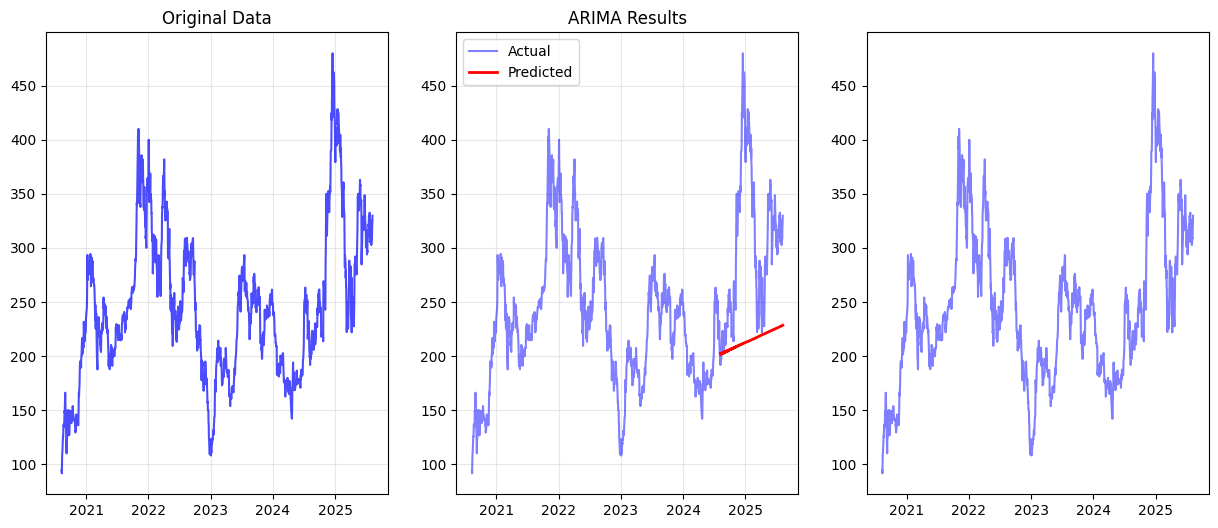

In [2]:
# One-liner forecasting with error handling
try:
    results = forecast('TSLA')
    
    if results and 'results' in results:
        print(f"📊 Models analyzed: {list(results['results'].keys())}")
        
        # Show metrics for each model
        for model_name, result in results['results'].items():
            if 'metrics' in result:
                metrics = result['metrics']
                print(f"{model_name}: MAE={metrics.get('MAE', 'N/A'):.4f}, RMSE={metrics.get('RMSE', 'N/A'):.4f}")
    else:
        print("❌ No results returned")
        
except Exception as e:
    print(f"❌ Error occurred: {e}")
    # Try without plotting
    print("\n🔄 Retrying without plotting...")
    try:
        results = forecast('TSLA', plot=False)
        if results and 'results' in results:
            print(f"✅ Success! Models analyzed: {list(results['results'].keys())}")
            for model_name, result in results['results'].items():
                if 'metrics' in result:
                    metrics = result['metrics']
                    print(f"{model_name}: MAE={metrics.get('MAE', 'N/A'):.4f}, RMSE={metrics.get('RMSE', 'N/A'):.4f}")
    except Exception as e2:
        print(f"❌ Still failed: {e2}")

## Step 3: Quick Metrics Only

Get just the performance metrics without plots.

In [3]:
# Quick metrics without plots
metrics = quick_forecast('TSLA')

if metrics:
    print("📈 Performance Metrics:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")

🚀 FORECASTING PIPELINE
✅ Loaded TSLA data: 1256 observations
📅 Date range: 2020-08-10 to 2025-08-08

🔧 ARIMA Analysis
ADF Statistic: -2.9405
p-value: 0.0408
Critical Values: {'1%': -3.4369525024039884, '5%': -2.8644550095200705, '10%': -2.568322093455802}
Stationary: Yes
Searching for optimal ARIMA parameters...
Best parameters: ARIMA(4, 2, 5) with AIC: 7230.16
✅ ARIMA(4, 2, 5) model fitted successfully
✅ Model saved to models/arima_model.pkl
📊 ARIMA - MAE: 88.9167, RMSE: 109.4539

🔧 LSTM Analysis
Training LSTM model for 50 epochs...
✅ LSTM model trained successfully
✅ LSTM model saved to models/lstm_model.h5
📊 LSTM - MAE: 13.9886, RMSE: 18.8721
📊 MODEL COMPARISON REPORT

📈 Performance Metrics:
           MAE      RMSE     MAPE
ARIMA  88.9167  109.4539  26.1502
LSTM   13.9886   18.8721   4.5210

🏆 Best Model by Metric:
MAE: LSTM (13.9886)
RMSE: LSTM (18.8721)
MAPE: LSTM (4.5210)

🥇 Overall Ranking (by average rank):
1. LSTM (Average Rank: 1.00)
2. ARIMA (Average Rank: 2.00)

📊 Statisti